# Device Insurance Attach Percentage Analysis  
## Jumbo & Company – Zopper Business Case

### Objective
Analyze historical device insurance attach percentages across stores and branches, 
identify key performance drivers, and predict January attach percentages at the store level.

### Dataset
Monthly attach percentage data (Aug–Dec) across 163 stores and multiple branches.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')

In [2]:
!pip install matplotlib seaborn

In [3]:
!pip install xlrd

In [4]:
df = pd.read_excel(
    r"C:\Users\Armaan\Downloads\Jumbo & Company_ Attach % .xls",
    engine="xlrd"
)

In [5]:
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [6]:
df.shape

(163, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB


In [8]:
df.describe()

,Dec,Nov,Oct,Sep,Aug
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.217239,0.217117,0.170920,0.167301,0.128589
std,0.173270,0.131246,0.116125,0.134518,0.116640
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095000,0.130000,0.100000,0.080000,0.035000
50%,0.200000,0.200000,0.160000,0.150000,0.110000
75%,0.300000,0.295000,0.240000,0.245000,0.190000
max,1.000000,0.700000,0.710000,0.800000,0.600000


## Initial Observations

### Dataset Overview
- Each row represents **one retail store**
- Total number of rows: **163 stores**
- Total number of columns: **7**
  - **2 categorical columns**
  - **5 numerical columns (monthly attach percentages)**

### Column Descriptions
- **Branch**:  
  Represents the geographical or organizational grouping of stores (e.g., Delhi_NCR, Pune, Gujarat).

- **Store_Name**:  
  Unique identifier for each retail store within a branch.

- **Aug, Sep, Oct, Nov, Dec**:  
  Monthly **insurance attach percentages**, indicating the proportion of device sales where an insurance plan was attached for that month.

### Missing Values & Data Quality
- No obvious missing values observed in the initial data inspection.
- Attach percentage values fall within a reasonable range (0–1), indicating valid percentage data.
- Some stores exhibit **significant variation across months**, which may indicate:
  - Seasonal effects in insurance sales
  - Differences in store-level sales practices
  - Opportunities for targeted performance improvement initiatives


In [9]:
df_long = df.melt(
    id_vars=["Branch", "Store_Name"],
    value_vars=["Aug", "Sep", "Oct", "Nov", "Dec"],
    var_name="Month",
    value_name="Attach_Percentage"
)

In [10]:
df_long.head()

,Branch,Store_Name,Month,Attach_Percentage
0,Delhi_Ncr,Delhi(Janakpuri) Br,Aug,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,Aug,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,Aug,0.43
3,Pune,Pune(Bhosari) Br,Aug,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,Aug,0.17


In [11]:
df_long.shape

(815, 4)

In [12]:
df_long["Month"].value_counts()

Month
Aug    163
Sep    163
Oct    163
Nov    163
Dec    163
Name: count, dtype: int64

In [13]:
df_long.describe()

,Attach_Percentage
count,815.000000
mean,0.180233
std,0.139740
min,0.000000
25%,0.080000
50%,0.170000
75%,0.260000
max,1.000000


## Data Structure After Reshaping

The dataset was converted from a wide format (one row per store with multiple month columns) 
to a long format where each row represents a single store-month combination.

### Updated Structure
- **Branch**: Geographic grouping of stores
- **Store_Name**: Individual retail store identifier
- **Month**: Month of observation (Aug–Dec)
- **Attach_Percentage**: Insurance attach rate for that store in the given month

### Why Reshaping Was Required
- Enables easier time-based analysis across months
- Simplifies aggregation at branch and store levels
- Supports trend analysis and visualization
- Prepares the data for forecasting future attach percentages

This structure is more suitable for exploratory analysis, store categorisation, and predictive modeling.


In [14]:
monthly_trend = (
    df_long
    .groupby("Month")["Attach_Percentage"]
    .mean()
    .reset_index()
)

monthly_trend

,Month,Attach_Percentage
0,Aug,0.128589
1,Dec,0.217239
2,Nov,0.217117
3,Oct,0.170920
4,Sep,0.167301


In [15]:
month_order = ["Aug", "Sep", "Oct", "Nov", "Dec"]

monthly_trend["Month"] = pd.Categorical(
    monthly_trend["Month"],
    categories=month_order,
    ordered=True
)

monthly_trend = monthly_trend.sort_values("Month")
monthly_trend


,Month,Attach_Percentage
0,Aug,0.128589
4,Sep,0.167301
3,Oct,0.170920
2,Nov,0.217117
1,Dec,0.217239


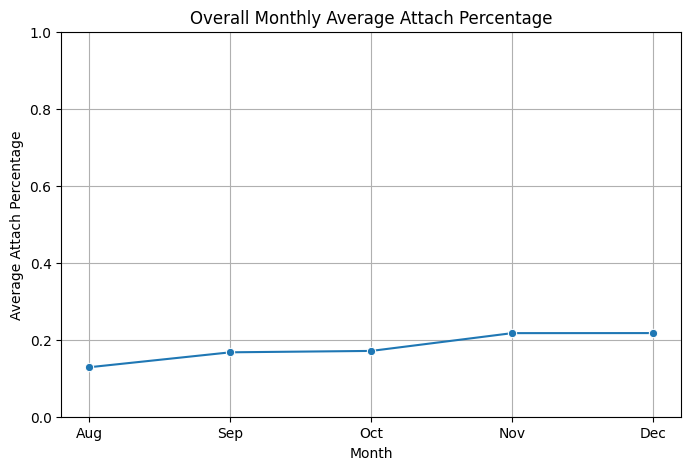

In [16]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=monthly_trend,
    x="Month",
    y="Attach_Percentage",
    marker="o"
)

plt.title("Overall Monthly Average Attach Percentage")
plt.xlabel("Month")
plt.ylabel("Average Attach Percentage")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

## Overall Monthly Attach Percentage Trend

The chart shows the average insurance attach percentage across all stores for each month.

### Key Observations
- The overall attach percentage remains relatively stable across the observed months, ranging approximately between 13% and 22%.
- A gradual increase is observed from August to November, followed by stabilization towards December.
- The absence of sharp spikes or drops suggests consistent insurance attachment performance across months.
- This stability indicates that attach percentage may be driven more by store-level practices rather than strong seasonality effects.

Understanding this pattern helps shift focus towards branch and store-level optimization rather than purely seasonal strategies.

### Branch-wise Performance Analysis, 

This answers: Which regions are driving Zopper’s business, and which need intervention?

In [17]:
branch_performance = (
    df_long
    .groupby("Branch")["Attach_Percentage"]
    .mean()
    .reset_index()
    .sort_values("Attach_Percentage", ascending=False)
)

branch_performance


,Branch,Attach_Percentage
3,Pune,0.276500
0,Delhi_Ncr,0.243682
2,Mumbai,0.173474
5,Thane,0.148600
1,Gujarat,0.134583
4,Telangana,0.118350


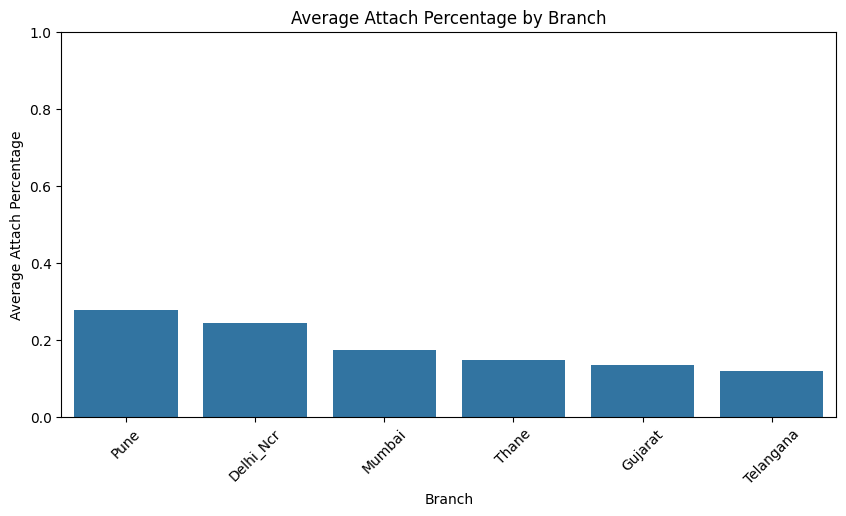

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=branch_performance,
    x="Branch",
    y="Attach_Percentage"
)

plt.title("Average Attach Percentage by Branch")
plt.xlabel("Branch")
plt.ylabel("Average Attach Percentage")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


## Branch-wise Attach Percentage Performance

The chart compares the average insurance attach percentage across different branches.

### Key Observations
- **Pune** emerges as the highest-performing branch in terms of attach percentage, indicating strong adoption of insurance plans at the store level.
- **Delhi_NCR** also shows relatively strong performance, suggesting effective sales practices or higher customer acceptance.
- **Telangana** records the lowest average attach percentage, highlighting a potential area for improvement.
- The noticeable variation across branches suggests that attach performance is influenced more by regional or operational factors than by overall seasonality.

### Business Implications
- High-performing branches such as Pune can serve as benchmarks for best practices.
- Low-performing branches like Telangana may benefit from targeted interventions such as staff training, revised incentive structures, or focused promotional campaigns.


In [19]:
store_performance = (
    df_long
    .groupby(["Branch", "Store_Name"])["Attach_Percentage"]
    .mean()
    .reset_index()
    .sort_values("Attach_Percentage", ascending=False)
)

store_performance.head(10)


,Branch,Store_Name,Attach_Percentage
9,Delhi_Ncr,Delhi(Hauz Khas),0.622
92,Pune,Pune(Hadapsar),0.586
94,Pune,Pune(Kondhawa),0.414
3,Delhi_Ncr,Delhi(Budh Vihar),0.390
5,Delhi_Ncr,Delhi(Daryaganj),0.386
90,Pune,Pune(Dange Chowk),0.368
145,Thane,Bhiwandi Br,0.362
18,Delhi_Ncr,Delhi(Narela),0.358
35,Delhi_Ncr,Haryana(Mewla M.) Br,0.352
41,Delhi_Ncr,Up(Greater Noida) Br,0.350


## Store-level Attach Percentage Performance

The table ranks stores based on their average insurance attach percentage across all observed months.

### Key Observations
- The top-performing store is **Delhi (Hauz Khas)**, which records the highest average attach percentage.
- A majority of the top 10 stores belong to **Pune** and **Delhi_NCR**, indicating strong and consistent performance within these branches.
- High-performing branches tend to have multiple stores with strong attach rates rather than reliance on a single standout store.

### Business Implications
- Best practices from top-performing stores in Pune and Delhi_NCR can be identified and replicated across other regions.
- Consistency across multiple stores suggests robust branch-level processes and effective sales strategies.


In [20]:
store_performance["Performance_Category"] = pd.qcut(
    store_performance["Attach_Percentage"],
    q=3,
    labels=["Low Performer", "Medium Performer", "High Performer"]
)

In [21]:
store_performance["Performance_Category"].value_counts()

Performance_Category
Medium Performer    55
Low Performer       54
High Performer      54
Name: count, dtype: int64

## Store Performance Categorisation

Stores were categorised into three performance groups based on their average attach percentage using percentile-based thresholds.

### Category Distribution
- **High Performers**: 54 stores
- **Medium Performers**: 55 stores
- **Low Performers**: 54 stores

### Key Insights
- The balanced distribution indicates a wide variation in store-level attach performance.
- High-performing stores significantly outperform the overall average and represent best-in-class execution.
- Low-performing stores present clear opportunities for improvement through targeted interventions.

This categorisation enables focused strategy formulation, allowing business teams to prioritize actions by store performance tier.


In [22]:
branch_category_dist = (
    store_performance
    .groupby(["Branch", "Performance_Category"], observed=True)
    .size()
    .reset_index(name="Store_Count")
)

branch_category_dist

,Branch,Performance_Category,Store_Count
0,Delhi_Ncr,Low Performer,6
1,Delhi_Ncr,Medium Performer,10
2,Delhi_Ncr,High Performer,28
3,Gujarat,Low Performer,11
4,Gujarat,Medium Performer,11
5,Gujarat,High Performer,2
6,Mumbai,Low Performer,5
7,Mumbai,Medium Performer,6
8,Mumbai,High Performer,8
9,Pune,Low Performer,1


## Branch-wise Distribution of Store Performance Categories

The table shows the distribution of store performance categories across branches.

### Key Observations
- **Delhi_NCR** stands out with a large concentration of **high-performing stores**, indicating strong and consistent execution across the branch.
- **Pune** also shows a healthy performance profile, with most stores falling in the high or medium performer categories.
- **Telangana** has a high number of **low-performing stores** and very few high performers, highlighting a significant opportunity for improvement.
- **Gujarat** and **Thane** show a skew towards low and medium performers, with limited representation in the high-performance category.

### Business Implications
- Best practices from high-performing branches such as Delhi_NCR and Pune can be identified and replicated in underperforming regions.
- Low-performing branches may benefit from focused interventions including training, sales enablement, and targeted incentive programs.


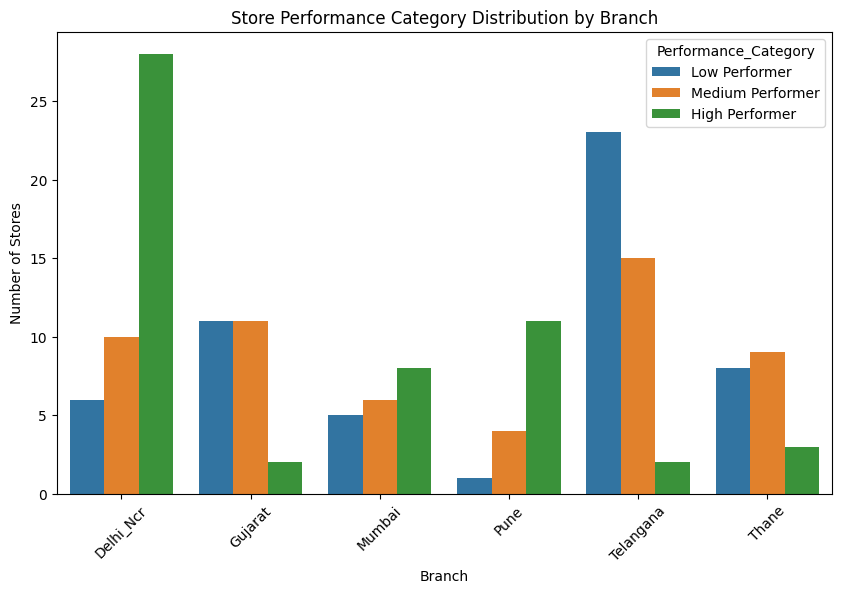

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=branch_category_dist,
    x="Branch",
    y="Store_Count",
    hue="Performance_Category"
)

plt.title("Store Performance Category Distribution by Branch")
plt.xlabel("Branch")
plt.ylabel("Number of Stores")
plt.xticks(rotation=45)
plt.show()


In [24]:
month_mapping = {
    "Aug": 1,
    "Sep": 2,
    "Oct": 3,
    "Nov": 4,
    "Dec": 5
}

df_long["Month_Index"] = df_long["Month"].map(month_mapping)
df_long.head()

,Branch,Store_Name,Month,Attach_Percentage,Month_Index
0,Delhi_Ncr,Delhi(Janakpuri) Br,Aug,0.24,1
1,Delhi_Ncr,Haryana(Gurgaon) Br,Aug,0.04,1
2,Delhi_Ncr,Up(Greater Noida) Br,Aug,0.43,1
3,Pune,Pune(Bhosari) Br,Aug,0.32,1
4,Gujarat,Ahmedabad(Maninagar) Br,Aug,0.17,1


In [25]:
!pip install scikit-learn

In [26]:
from sklearn.linear_model import LinearRegression

def predict_january(store_df):
    X = store_df[["Month_Index"]]
    y = store_df["Attach_Percentage"]

    model = LinearRegression()
    model.fit(X, y)

    jan_index = pd.DataFrame({"Month_Index": [6]})  # January
    jan_pred = model.predict(jan_index)[0]

    return max(0, min(1, jan_pred))

In [27]:
jan_index = pd.DataFrame({"Month_Index": [6]})

In [28]:
def predict_january(store_df):
    X = store_df[["Month_Index"]]
    y = store_df["Attach_Percentage"]
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Use DataFrame to preserve feature name
    jan_index = pd.DataFrame({"Month_Index": [6]})
    jan_pred = model.predict(jan_index)[0]
    
    return max(0, min(1, jan_pred))

In [29]:
january_predictions = (
    df_long
    .groupby(["Branch", "Store_Name"])
    .apply(predict_january, include_groups=False)
    .reset_index(name="Predicted_Jan_Attach_Percentage")
)

In [30]:
january_predictions.head()

,Branch,Store_Name,Predicted_Jan_Attach_Percentage
0,Delhi_Ncr,DELHI(ASHOK VIHAR),0.211
1,Delhi_Ncr,DELHI(KRISHNA NAGAR),0.200
2,Delhi_Ncr,DELHI(ROHINI Sector-16),0.154
3,Delhi_Ncr,Delhi(Budh Vihar),0.552
4,Delhi_Ncr,Delhi(Burari),0.418


In [31]:
january_predictions = january_predictions.merge(
    store_performance[["Branch", "Store_Name", "Performance_Category"]],
    on=["Branch", "Store_Name"],
    how="left"
)

january_predictions.head()


,Branch,Store_Name,Predicted_Jan_Attach_Percentage,Performance_Category
0,Delhi_Ncr,DELHI(ASHOK VIHAR),0.211,Low Performer
1,Delhi_Ncr,DELHI(KRISHNA NAGAR),0.200,Medium Performer
2,Delhi_Ncr,DELHI(ROHINI Sector-16),0.154,Low Performer
3,Delhi_Ncr,Delhi(Budh Vihar),0.552,High Performer
4,Delhi_Ncr,Delhi(Burari),0.418,High Performer


## Summary & Key Takeaways

- Attach percentage performance varies significantly across branches and individual stores.
- Delhi_NCR and Pune consistently outperform other regions, driven by a higher concentration of high-performing stores.
- Store-level categorisation highlights clear opportunities for targeted improvement in low-performing branches such as Telangana and Gujarat.
- A trend-based forecasting approach was used to predict January attach percentages at the store level.
- The predictions align with historical performance patterns and provide actionable insights for proactive planning.

### Recommendations
- Replicate best practices from high-performing stores in Delhi_NCR and Pune.
- Focus training and incentive programs on low-performing stores and branches.
- Use predicted January attach percentages to prioritize stores requiring immediate attention.
